In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
image_size = (224,224)
batch_size = 32

# Train_Validation_Split

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory(
                directory = r"C:\Users\Bhaypreet\OneDrive\Pictures\IIT ROPAR\data_science_projects\INDIAN FOOD\Indian Food Images",
                image_size = image_size,
                batch_size = 32,
                validation_split=0.2,
                subset="training",
                seed=123   
)

val_data = tf.keras.utils.image_dataset_from_directory(
                directory = r"C:\Users\Bhaypreet\OneDrive\Pictures\IIT ROPAR\data_science_projects\INDIAN FOOD\Indian Food Images",
                image_size = image_size,
                batch_size = 32,
                validation_split=0.2,
                subset="validation",
                seed=123   
)

class_names = train_data.class_names

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.RandomFlip("horizontal"),
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
#     tf.keras.layers.RandomContrast(0.1),
# ])

# train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))
# val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 4000 files belonging to 80 classes.
Using 3200 files for training.
Found 4000 files belonging to 80 classes.
Using 800 files for validation.


# ResNet

In [4]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model.trainable = False

model_ResNet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

# Normalizer

In [5]:
from tensorflow.keras.applications.resnet50 import preprocess_input

def normalizer_reset(image, label):
    image = preprocess_input(image) 
    return image, label

In [6]:
train_data_reset = train_data.map(normalizer_reset)
val_data_reset = val_data.map(normalizer_reset)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

earlystop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)
reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6, verbose=1)


In [11]:
model_ResNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training Starts

In [12]:
history2 = model_ResNet.fit(
    train_data_reset,
    validation_data=val_data_reset,
    epochs=20,callbacks = [reduce_LR,earlystop])

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 685s 7s/step - accuracy: 0.0999 - loss: 3.9962 - val_accuracy: 0.2200 - val_loss: 3.2245 - learning_rate: 0.0010
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 847s 8s/step - accuracy: 0.2935 - loss: 2.7766 - val_accuracy: 0.3587 - val_loss: 2.4907 - learning_rate: 0.0010
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 679s 6s/step - accuracy: 0.4265 - loss: 2.1365 - val_accuracy: 0.4125 - val_loss: 2.2134 - learning_rate: 0.0010
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 610s 6s/step - accuracy: 0.5305 - loss: 1.7217 - val_accuracy: 0.4688 - val_loss: 2.0291 - learning_rate: 0.0010
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 817s 8s/step - accuracy: 0.6053 - loss: 1.4398 - val_accuracy: 0.4950 - val_loss: 1.8964 - learning_rate: 0.0010
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 513s 5s/step - accuracy: 0.6530 - loss: 1.2221 - val_accuracy: 0.5038 - val_loss: 1.8559 - learning_rate: 0.0010
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 647s 6s/step - accuracy: 0.7243 - loss: 1.

# Comparisons

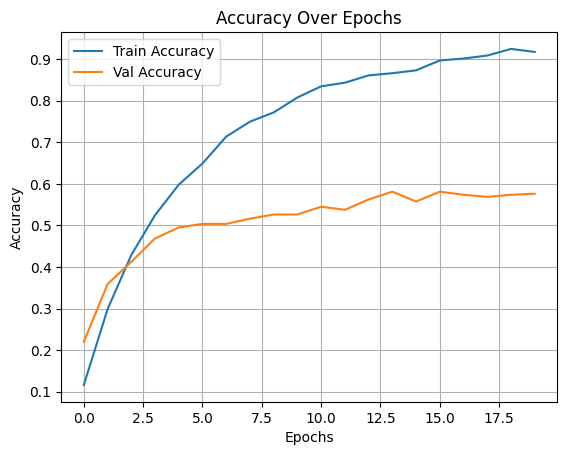

In [14]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

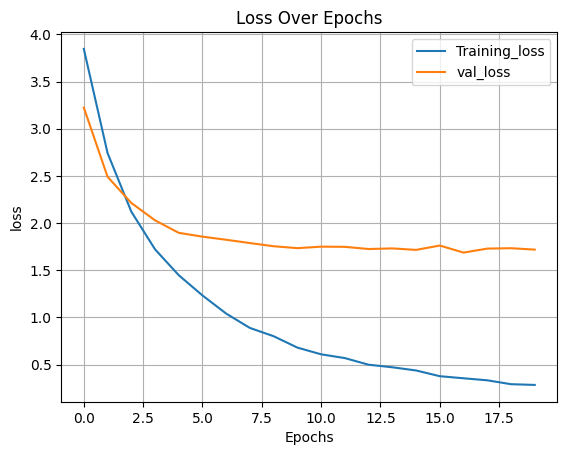

In [15]:
plt.plot(history2.history['loss'], label='Training_loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
model_ResNet.save("ResetNet_FOOD.h5")
